In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [27]:
df=pd.read_csv("emotion_dataset_raw.csv")
print(df)

        Emotion                                               Text
0       neutral                                             Why ? 
1           joy    Sage Act upgrade on my to do list for tommorow.
2       sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3           joy   Such an eye ! The true hazel eye-and so brill...
4           joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
...         ...                                                ...
34787  surprise  @MichelGW have you gift! Hope you like it! It'...
34788       joy  The world didnt give it to me..so the world MO...
34789     anger                           A man robbed me today . 
34790      fear  Youu call it JEALOUSY, I call it of #Losing YO...
34791   sadness  I think about you baby, and I dream about you ...

[34792 rows x 2 columns]


In [16]:
print(df["Emotion"].unique())

['neutral' 'joy' 'sadness' 'fear' 'surprise' 'anger' 'shame' 'disgust']


In [17]:
desired_emotions=['joy' ,'sadness', 'fear', 'anger', 'shame' ,'disgust']

In [29]:
pre_df=df[df['Emotion'].isin(desired_emotions)]
print(pre_df["Emotion"].unique())

['joy' 'sadness' 'fear' 'anger' 'shame' 'disgust']


In [30]:
print(pre_df)

       Emotion                                               Text
1          joy    Sage Act upgrade on my to do list for tommorow.
2      sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3          joy   Such an eye ! The true hazel eye-and so brill...
4          joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
5         fear  I'm expecting an extremely important phonecall...
...        ...                                                ...
34786      joy    Tuesday woken up to Oscar and Cornet practice X
34788      joy  The world didnt give it to me..so the world MO...
34789    anger                           A man robbed me today . 
34790     fear  Youu call it JEALOUSY, I call it of #Losing YO...
34791  sadness  I think about you baby, and I dream about you ...

[28476 rows x 2 columns]


In [31]:

label_counts = pre_df['Emotion'].value_counts()

# Print the label counts
print(label_counts)


joy        11045
sadness     6722
fear        5410
anger       4297
disgust      856
shame        146
Name: Emotion, dtype: int64


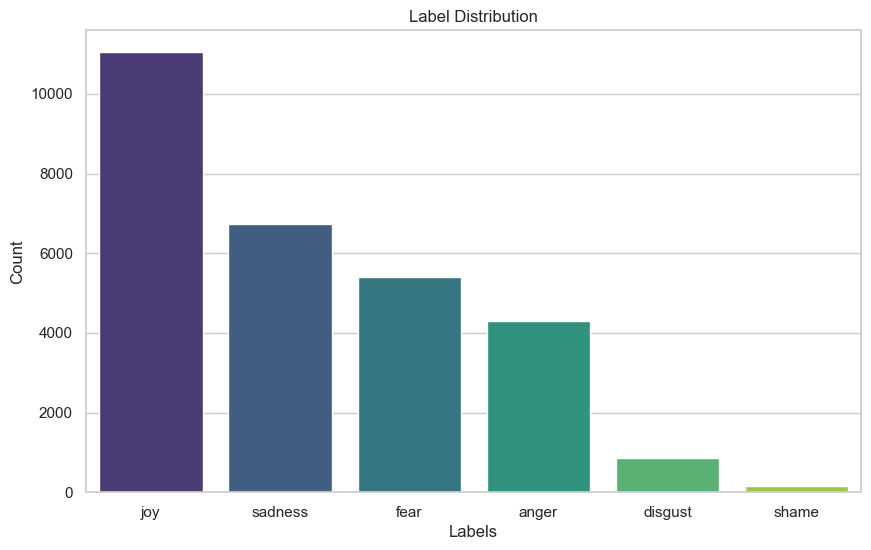

In [32]:
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add titles and labels
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')

# Display the plot
plt.show()


In [33]:
import re
pre_df_copy=pre_df.copy()
print(pre_df_copy)

       Emotion                                               Text
1          joy    Sage Act upgrade on my to do list for tommorow.
2      sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3          joy   Such an eye ! The true hazel eye-and so brill...
4          joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
5         fear  I'm expecting an extremely important phonecall...
...        ...                                                ...
34786      joy    Tuesday woken up to Oscar and Cornet practice X
34788      joy  The world didnt give it to me..so the world MO...
34789    anger                           A man robbed me today . 
34790     fear  Youu call it JEALOUSY, I call it of #Losing YO...
34791  sadness  I think about you baby, and I dream about you ...

[28476 rows x 2 columns]


In [34]:
# Remove duplicates
pre_df_copy.drop_duplicates(inplace=True)

# Handle missing values
pre_df_copy.dropna(inplace=True)

# Text preprocessing function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text preprocessing
pre_df_copy['cleaned_text'] = pre_df_copy['Text'].apply(clean_text)

print(pre_df_copy.head())


   Emotion                                               Text  \
1      joy    Sage Act upgrade on my to do list for tommorow.   
2  sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
3      joy   Such an eye ! The true hazel eye-and so brill...   
4      joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
5     fear  I'm expecting an extremely important phonecall...   

                                        cleaned_text  
1     sage act upgrade on my to do list for tommorow  
2  on the way to my homegirl baby funeral man i h...  
3  such an eye the true hazel eyeand so brilliant...  
4  iluvmiasantos ugh babe hugggzzz for u babe naa...  
5  im expecting an extremely important phonecall ...  


In [35]:
# Save the DataFrame to a new CSV file
pre_df_copy.to_csv('preprocessed_dataset.csv', index=False)

print("Data saved to preprocessed_dataset.csv")


Data saved to preprocessed_dataset.csv


In [37]:
saved_df=pd.read_csv("preprocessed_dataset.csv")
print(saved_df)

       Emotion                                               Text  \
0          joy    Sage Act upgrade on my to do list for tommorow.   
1      sadness  ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...   
2          joy   Such an eye ! The true hazel eye-and so brill...   
3          joy  @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...   
4         fear  I'm expecting an extremely important phonecall...   
...        ...                                                ...   
25676      joy    Tuesday woken up to Oscar and Cornet practice X   
25677      joy  The world didnt give it to me..so the world MO...   
25678    anger                           A man robbed me today .    
25679     fear  Youu call it JEALOUSY, I call it of #Losing YO...   
25680  sadness  I think about you baby, and I dream about you ...   

                                            cleaned_text  
0         sage act upgrade on my to do list for tommorow  
1      on the way to my homegirl baby funeral man i h

In [39]:
import random
from nltk.corpus import wordnet

In [40]:
# Function to replace words with synonyms
def replace_synonyms(text):
    words = text.split()
    new_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = random.choice(synonyms).lemmas()[0].name()
            new_words.append(synonym)
        else:
            new_words.append(word)
    return ' '.join(new_words)

# Apply synonym replacement
pre_df_copy['augmented_text'] = pre_df_copy['cleaned_text'].apply(replace_synonyms)

print(pre_df_copy.head())


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\ADMIN/nltk_data'
    - 'C:\\Users\\ADMIN\\anaconda3\\nltk_data'
    - 'C:\\Users\\ADMIN\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ADMIN\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ADMIN\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [41]:
from imblearn.over_sampling import RandomOverSampler


In [42]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming pre_df_copy is your DataFrame with cleaned text and emotions
X = pre_df_copy['cleaned_text']  # Features
y = pre_df_copy['Emotion']       # Labels

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)

# Convert back to DataFrame
balanced_data = pd.DataFrame({'Text': X_resampled.flatten(), 'Emotion': y_resampled})

# Print the distribution of labels in the balanced dataset
print(balanced_data['Emotion'].value_counts())


joy        10464
sadness    10464
fear       10464
anger      10464
shame      10464
disgust    10464
Name: Emotion, dtype: int64


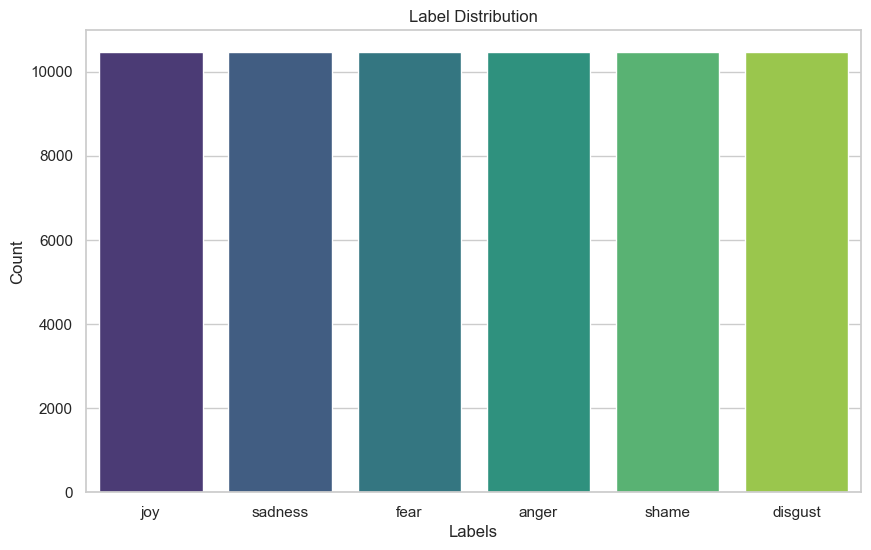

In [44]:
label_counts = balanced_data['Emotion'].value_counts()


# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add titles and labels
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')

# Display the plot
plt.show()


In [49]:
print(balanced_data)

                                                    Text  Emotion
0         sage act upgrade on my to do list for tommorow      joy
1      on the way to my homegirl baby funeral man i h...  sadness
2      such an eye the true hazel eyeand so brilliant...      joy
3      iluvmiasantos ugh babe hugggzzz for u babe naa...      joy
4      im expecting an extremely important phonecall ...     fear
...                                                  ...      ...
62779  eight out of agreed it was ok for girls to car...    shame
62780  he felt guilty as he thought of maeve s sweet ...    shame
62781  a lot of the time you just shoot because you r...    shame
62782  he felt guilty as he thought of maeve s sweet ...    shame
62783  what s this playing infant games still he dema...    shame

[62784 rows x 2 columns]


In [51]:

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(balanced_data['Text'])

print(X_tfidf.shape)


(62784, 5000)


In [54]:

# Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, balanced_data['Emotion'], test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)


(31392, 5000) (21974, 5000) (9418, 5000)


In [55]:
balanced_data.to_csv('final_dataset.csv', index=False)
